import dataset bank customer dengan file CSV, lalu membaca dataset dengan 10 baris pertama

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
df = pd.read_csv("/Bank Customer Churn Prediction.csv")
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


melihat data statistik dari dataset

In [177]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


melihat info pada data dan mengecek apakah ada nilai null pada data

In [178]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


mengecek outlier pada dataset

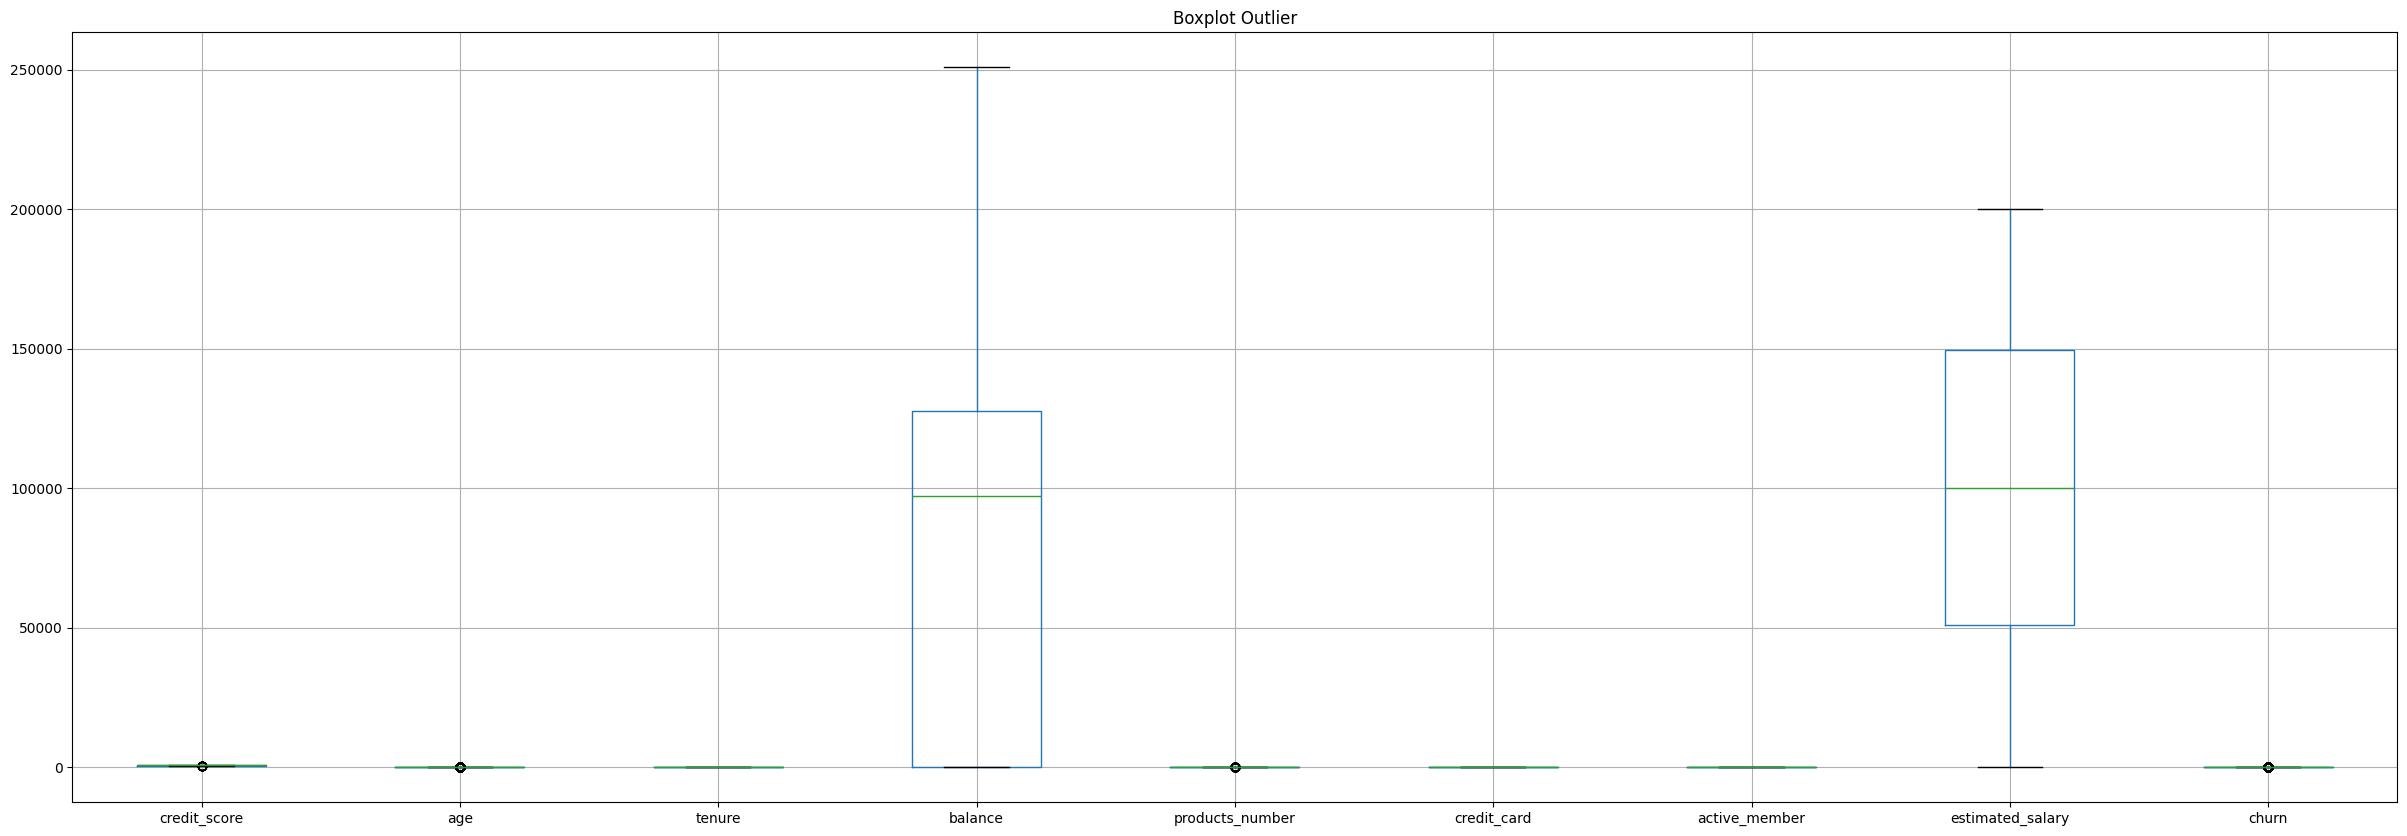

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_outlier = df.drop(columns=['customer_id'])

plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
df_outlier.boxplot()
plt.title("Boxplot Outlier")
plt.show()

In [180]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


one hot encoding

In [181]:
df = pd.get_dummies(df, columns=['country'], drop_first=True)
df.head()

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [182]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

merubah numerical column jadi z-score

In [183]:
numerical_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,15634602,-0.326221,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,False,False
1,15647311,-0.440036,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,False,True
2,15619304,-1.536794,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,False,False
3,15701354,0.501521,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,False,False
4,15737888,2.063884,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,False,True


mensplit data uji dan data latih

In [184]:
X = df.drop(columns=["churn", "customer_id"])
y = df["churn"]

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
)

membangun model logistic regression

In [186]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [187]:
prediksi = model.predict(X_test)

In [188]:
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [189]:
intercept = model.intercept_[0]
koefisien = model.coef_[0]
print("Intercept: ", intercept)
print("Koefisien: ", koefisien)

Intercept:  -0.9813672073733083
Koefisien:  [-0.06421162 -0.52792633  0.76153333 -0.04593995  0.16496414 -0.05911885
 -0.046097   -1.07229804  0.02715445  0.77112097  0.033764  ]


In [190]:
# Check data types before passing to statsmodels
print("Data types in X:")
print(X.dtypes)
print("\nData type of y:")
print(y.dtype)

Data types in X:
credit_score        float64
gender                int64
age                 float64
tenure              float64
balance             float64
products_number     float64
credit_card           int64
active_member         int64
estimated_salary    float64
country_Germany        bool
country_Spain          bool
dtype: object

Data type of y:
int64


In [191]:
x_train_const = sm.add_constant(X.astype(float)) # Secara eksplisit ubah X menjadi float untuk memastikan data numerik
logit_model = sm.Logit(y, x_train_const)
logit_model = logit_model.fit()
print(logit_model.pvalues)

Optimization terminated successfully.
         Current function value: 0.428068
         Iterations 6
const                8.842093e-48
credit_score         1.712765e-02
gender               3.044696e-22
age                 2.521111e-175
tenure               8.821318e-02
balance              2.922724e-07
products_number      3.124760e-02
credit_card          4.515135e-01
active_member        1.434412e-77
estimated_salary     3.101752e-01
country_Germany      2.413604e-30
country_Spain        6.180842e-01
dtype: float64


In [192]:
accuracy = accuracy_score(y_test, prediksi)
print("Akurasi: ", accuracy)

conf_matrix = confusion_matrix(y_test, prediksi)
print("Confusion Matrix:")
print(conf_matrix)

classification_rep = classification_report(y_test, prediksi)
print("Classification Report:")
print(classification_rep)

Akurasi:  0.81
Confusion Matrix:
[[1544   63]
 [ 317   76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.19      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.77      0.81      0.77      2000



model tuning

implementasi grid search

In [193]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
    'solver': ['saga'],
    'max_iter': [1000]
}

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(solver='saga', max_iter=1000)
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=1)

fit model dengan data training

In [195]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, solver='saga'),
             n_jobs=1,
             param_grid={'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
                         'max_iter': [1000], 'solver': ['saga']},
             scoring='accuracy')

evaluate model

In [196]:
print("Best Params: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Params:  {'C': 0.25, 'max_iter': 1000, 'solver': 'saga'}
Best Score:  0.810375


In [197]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [198]:
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: ", accuracy)
intercept = best_model.intercept_
print("Intercept: ", intercept)
coefficient = best_model.coef_
print("Coefficient: ", coefficient)

Akurasi:  0.811
Intercept:  [-1.00011465]
Coefficient:  [[-0.06773618 -0.52407637  0.7476577  -0.04236998  0.16275195 -0.06011128
  -0.02158929 -1.04926332  0.0158864   0.76097199  0.08237985]]


In [199]:
x_train_const = sm.add_constant(X_train.astype(float)) # Secara eksplisit ubah X_train menjadi float untuk memastikan data numerik
logit_model = sm.Logit(y_train, x_train_const) # Menggunakan y_train sebagai dependent variable
logit_model = logit_model.fit()
print(logit_model.pvalues)

Optimization terminated successfully.
         Current function value: 0.431349
         Iterations 6
const                5.826074e-40
credit_score         2.474344e-02
gender               1.703162e-18
age                 1.169174e-139
tenure               1.556627e-01
balance              6.610373e-06
products_number      4.644080e-02
credit_card          7.331169e-01
active_member        3.660599e-62
estimated_salary     6.039001e-01
country_Germany      6.492682e-25
country_Spain        2.421422e-01
dtype: float64


In [200]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7988
Method:                           MLE   Df Model:                           11
Date:                Tue, 20 May 2025   Pseudo R-squ.:                  0.1508
Time:                        14:55:26   Log-Likelihood:                -3450.8
converged:                       True   LL-Null:                       -4063.5
Covariance Type:            nonrobust   LLR p-value:                5.557e-256
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.9976      0.075    -13.231      0.000      -1.145      -0.850
credit_score        -0.0680      0.030     -2.245      0.025      -0.127      -0.009
gender              -0.5323 

In [201]:
confusion_matrix(y_test, prediksi)


array([[1544,   63],
       [ 317,   76]])

In [202]:
print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.19      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.77      0.81      0.77      2000



In [203]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Use the best_model from the grid search, which is already fitted
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba) # Calculate the AUC score using roc_auc_score
print("AUC Score:", auc_score)

AUC Score: 0.7791943960186904


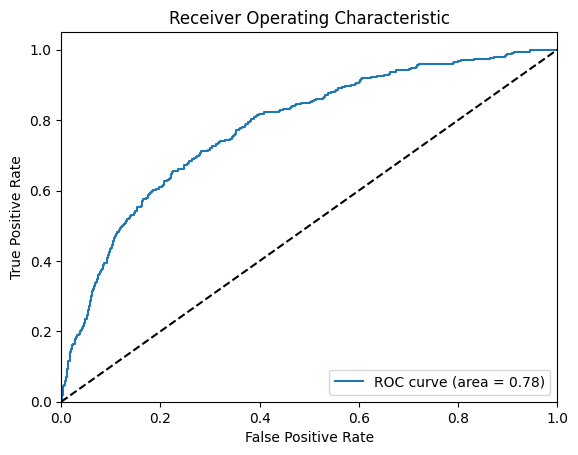

In [204]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()